d:\miniconda\envs\torch\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\praga\AppData\Local\Temp\ipykernel_16968\3667996894.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, z, cmap= ['#000033', '#000066', '#0000CC', '#0033FF', '#00CCFF', '#00FF99', '#FFFF00', '#FF6600', '#FF0000'], alpha=0.3);


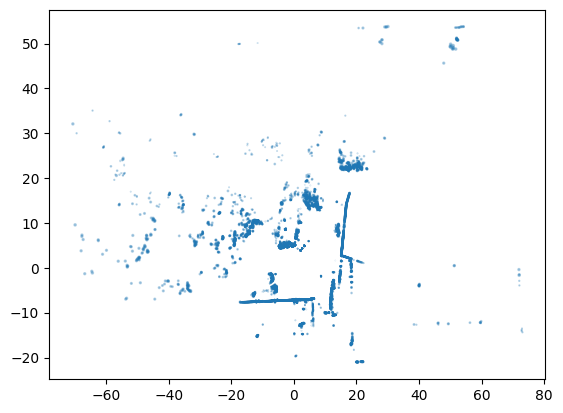

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os


points = np.fromfile(r'F:\Work\DeepLearning\Research\dataset\data_object_velodyne\training\velodyne\000000.bin', dtype=np.float32).reshape(-1, 4)
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]
z_normalized = (z - z.min()) / (z.max() - z.min())
plt.scatter(x, y, z, cmap= ['#000033', '#000066', '#0000CC', '#0033FF', '#00CCFF', '#00FF99', '#FFFF00', '#FF6600', '#FF0000'], alpha=0.3);

Creating KITTI-style bird's eye view visualization...


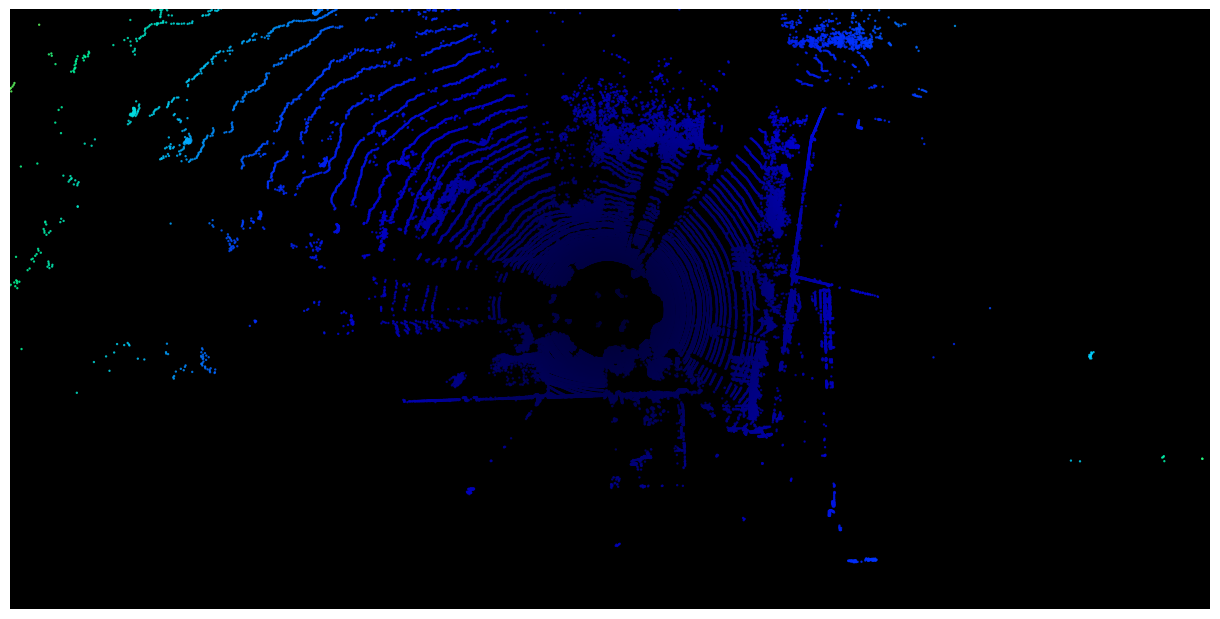

Creating 3D visualization...


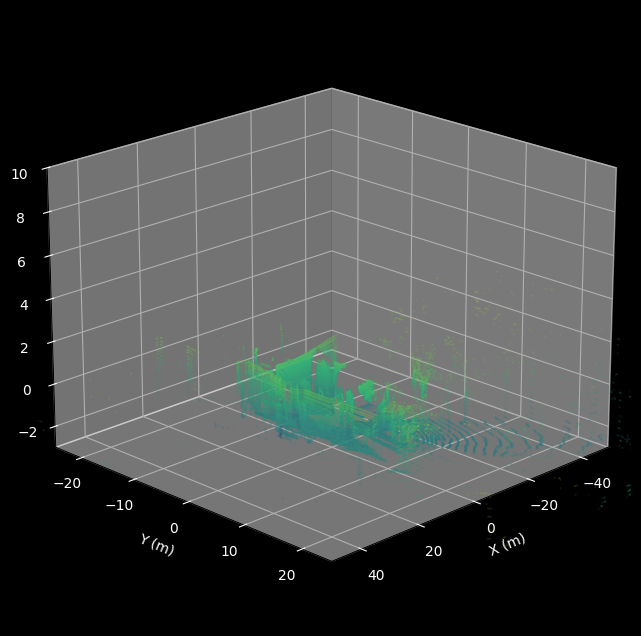

Processing 000108.bin...


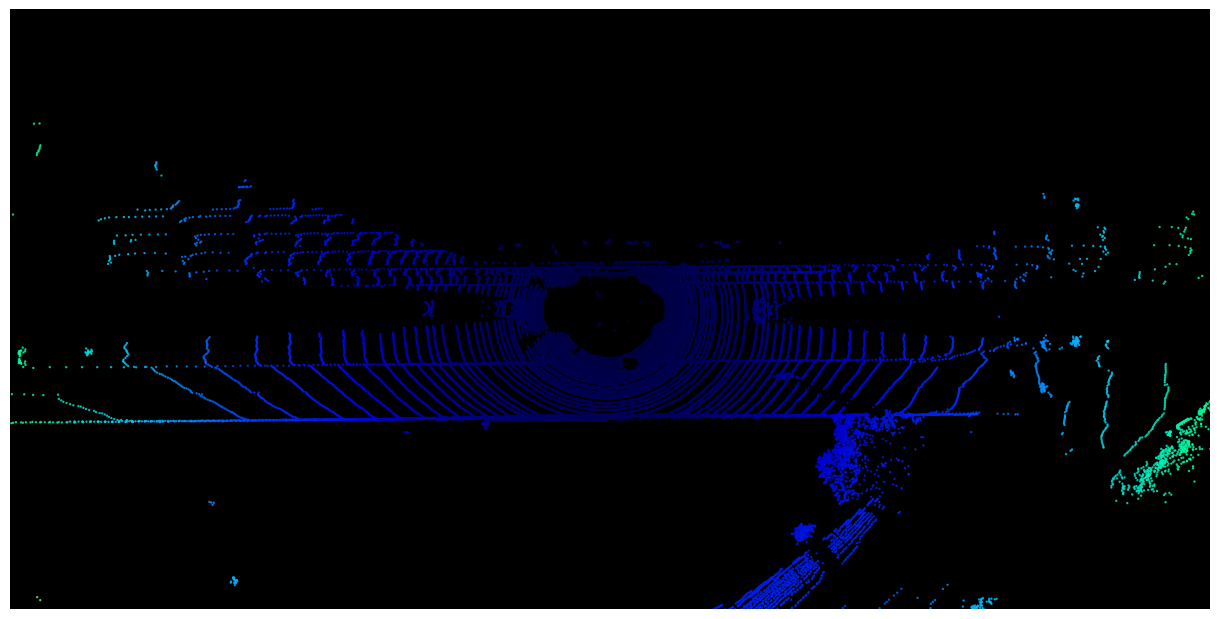

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

def load_velodyne_points(velodyne_file):
    """Load point cloud data from KITTI velodyne binary file"""
    points = np.fromfile(velodyne_file, dtype=np.float32).reshape(-1, 4)
    return points[:, :3]  # x, y, z coordinates

def create_kitti_visualization(velodyne_file, save_path=None):
    """Create KITTI-style point cloud visualization"""
    
    # Load point cloud data
    points = load_velodyne_points(velodyne_file)
    
    # Extract coordinates
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    
    # Create figure with black background
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    # fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    
    # Calculate distance from origin for color mapping
    distances = np.sqrt(x**2 + y**2 + z**2)
    
    # Create custom colormap (similar to KITTI vi   sualization)
    colors = ['#000033', '#000066', '#0000CC', '#0033FF', '#00CCFF', '#00FF99', '#FFFF00', '#FF6600', '#FF0000']
    n_bins = 256
    cmap = LinearSegmentedColormap.from_list('kitti', colors, N=n_bins)
    
    # Create bird's eye view (x-y projection)
    scatter = ax.scatter(x, y, c=distances, cmap=cmap, s=0.5, alpha=0.8)
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(-50, 50)
    ax.set_ylim(-25, 25)
    
    # Remove axes and ticks for clean look
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Tight layout
    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    if save_path:
        plt.savefig(save_path, facecolor='black', edgecolor='none', dpi=150, bbox_inches='tight', pad_inches=0)
    
    plt.show()

def create_3d_visualization(velodyne_file, save_path=None):
    """Create 3D point cloud visualization"""
    
    # Load point cloud data
    points = load_velodyne_points(velodyne_file)
    
    # Extract coordinates
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 8))
    fig.patch.set_facecolor('black')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('black')
    
    # Calculate height-based colors
    z_normalized = (z - z.min()) / (z.max() - z.min())
    
    # Custom colormap for height visualization
    colors = ['#440154', '#31688e', '#35b779', '#fde725']
    cmap = LinearSegmentedColormap.from_list('height', colors, N=256)
    
    # Plot points
    scatter = ax.scatter(x, y, z, c=z_normalized, cmap=cmap, s=0.3, alpha=0.1)
    
    # Set labels and limits
    ax.set_xlabel('X (m)', color='white')
    ax.set_ylabel('Y (m)', color='white')
    ax.set_zlabel('Z (m)', color='white')
    
    # Set limits
    ax.set_xlim(-50, 50)
    ax.set_ylim(-25, 25)
    ax.set_zlim(-3, 10)
    
    # Set viewing angle
    ax.view_init(elev=20, azim=45)
    
    # Style the plot
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')
    
    if save_path:
        plt.savefig(save_path, facecolor='black', edgecolor='none', dpi=150, bbox_inches='tight')
    
    plt.show()

# Example usage:
# Replace with your actual file path
velodyne_file = "../dataset/data_object_velodyne/training/velodyne/000000.bin"

# Check if file exists
if os.path.exists(velodyne_file):
    print("Creating KITTI-style bird's eye view visualization...")
    create_kitti_visualization(velodyne_file, "kitti_birdseye.png")
    
    print("Creating 3D visualization...")
    create_3d_visualization(velodyne_file, "kitti_3d.png")
else:
    print(f"File not found: {velodyne_file}")
    print("Please update the file path to point to an actual .bin file in your velodyne folder")

# Function to process multiple files
def process_multiple_files(velodyne_dir, num_files=5):
    """Process multiple velodyne files and create visualizations"""
    
    bin_files = [f for f in os.listdir(velodyne_dir) if f.endswith('.bin')]
    bin_files.sort()
    
    for i, filename in enumerate(bin_files[108:108+1]):
        velodyne_file = os.path.join(velodyne_dir, filename)
        print(f"Processing {filename}...")
        
        save_path = f"kitti_viz_{filename[:-4]}.png"
        create_kitti_visualization(velodyne_file, save_path)

# Uncomment to process multiple files:
process_multiple_files("../dataset/data_object_velodyne/training/velodyne/", 6)

In [ ]:
import numpy as np

# Path to a Velodyne .bin file
file_path = 'F:/Work/DeepLearning/Research/dataset/data_object_velodyne/training/velodyne/000000.bin'

# Read the binary file
points = np.fromfile(file_path, dtype=np.float32)  # Read as float32
points = points.reshape(-1, 4)  # Each point has 4 values: x, y, z, reflectance

# Print first 5 points
print(points[:5])


(461536,)


Using sample index: 000001
Loading data...
Image shape: (375, 1242, 3)
LiDAR points: 120268
Projecting LiDAR points to image...
Valid projected points: 18630
Depth range: 4.8m - 76.7m


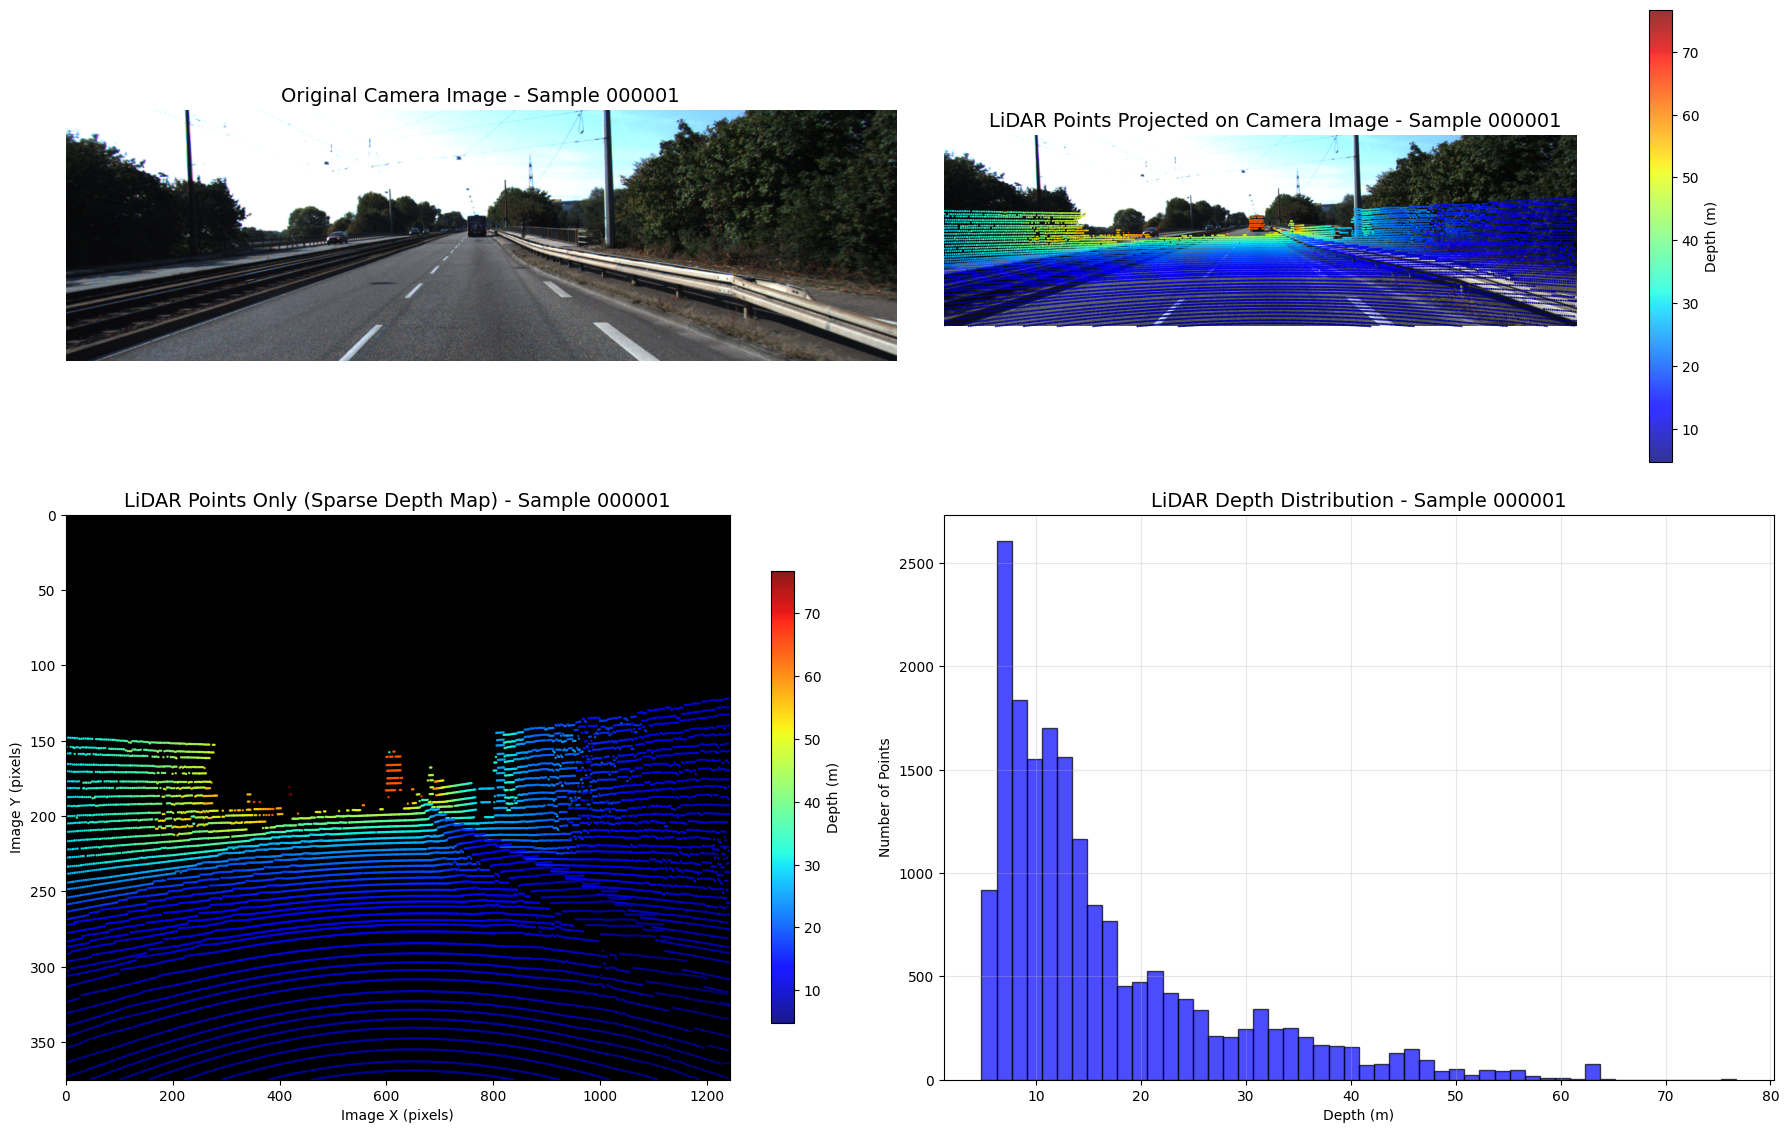

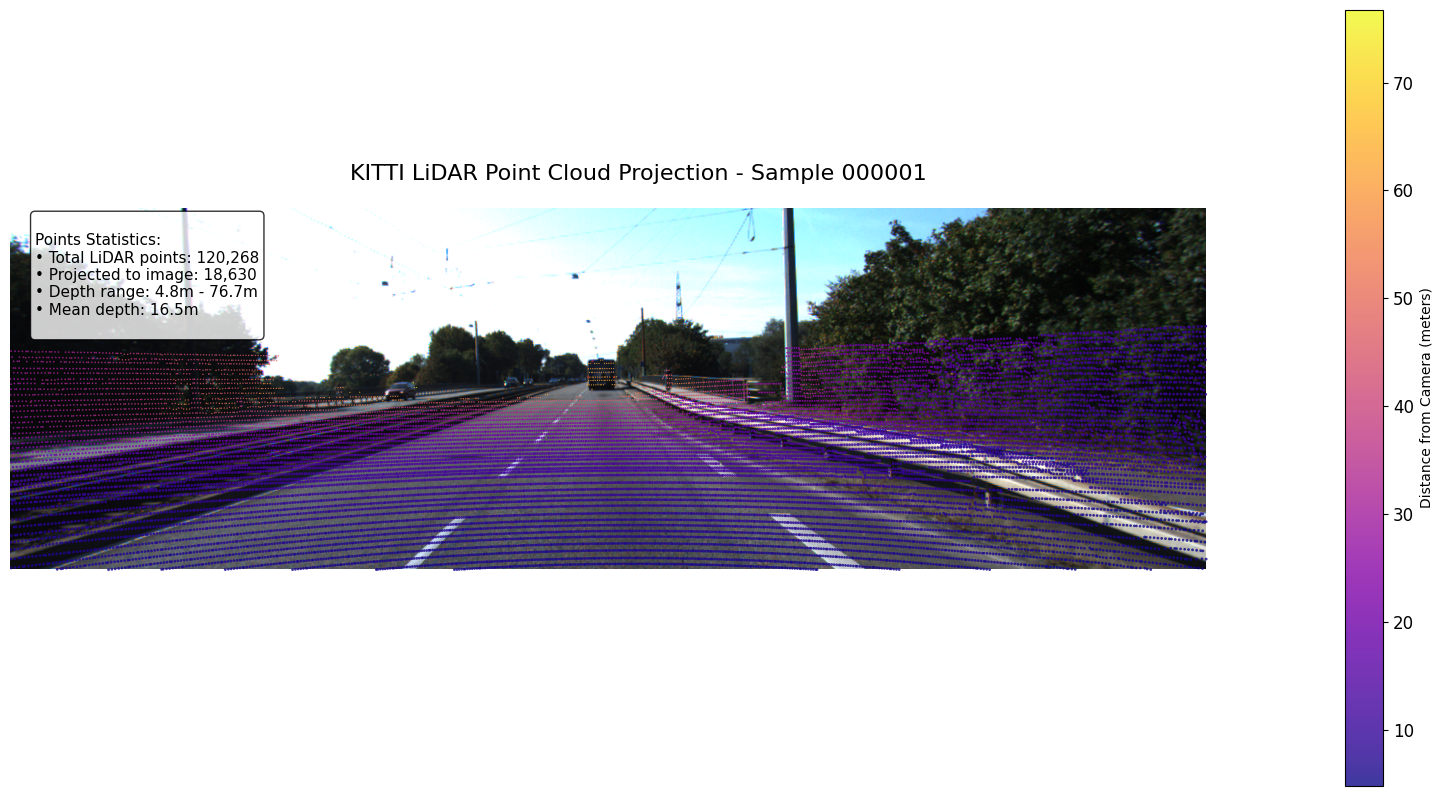


PROJECTION COMPLETE
Successfully projected 18,630 LiDAR points onto camera image
Coverage: 15.5% of total LiDAR points visible in camera view


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# ==== CONFIG ====
BASE_PATH = Path(r"F:\Work\DeepLearning\Research\dataset")
IMG_DIR = BASE_PATH / "data_object_image_2" / "training" / "image_2"
LIDAR_DIR = BASE_PATH / "data_object_velodyne" / "training" / "velodyne"
CALIB_DIR = BASE_PATH / "data_object_calib" / "training" / "calib"

# Pick first sample automatically
INDEX = Path(sorted(IMG_DIR.glob("*.png"))[1]).stem
print(f"Using sample index: {INDEX}")

# ==== FUNCTIONS ====
def read_calib_file(filepath):
    """Reads KITTI calibration file and returns a dict."""
    data = {}
    with open(filepath, 'r') as f:
        for line in f:
            if ":" in line:
                key, value = line.split(":", 1)
                data[key] = np.array([float(x) for x in value.strip().split()])
    return data

def load_lidar_data(file_path):
    """Loads LiDAR .bin file from KITTI."""
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)

def project_lidar_to_image(points, calib):
    """Projects LiDAR points to camera image plane."""
    # Get calibration matrices
    P2 = calib['P2'].reshape(3, 4)
    Tr_velo_to_cam = calib['Tr_velo_to_cam'].reshape(3, 4)
    R0_rect = calib['R0_rect'].reshape(3, 3)
    
    # Convert to homogeneous coordinates
    points_h = np.hstack((points[:, :3], np.ones((points.shape[0], 1))))
    
    # Transform: Velodyne -> Camera -> Rectified Camera
    pts_cam = (R0_rect @ (Tr_velo_to_cam @ points_h.T)).T
    
    # Filter points in front of camera (positive Z)
    front_mask = pts_cam[:, 2] > 0
    pts_cam_front = pts_cam[front_mask]
    
    # Project to image plane
    pts_cam_h = np.hstack((pts_cam_front, np.ones((pts_cam_front.shape[0], 1))))
    pts_img = (P2 @ pts_cam_h.T).T
    
    # Convert from homogeneous coordinates
    pts_img[:, 0] /= pts_img[:, 2]
    pts_img[:, 1] /= pts_img[:, 2]
    
    return pts_img[:, :2], pts_cam_front[:, 2]

# ==== MAIN ====
# File paths
img_path = IMG_DIR / f"{INDEX}.png"
lidar_path = LIDAR_DIR / f"{INDEX}.bin"
calib_path = CALIB_DIR / f"{INDEX}.txt"

# Check files exist
for p in [img_path, lidar_path, calib_path]:
    if not p.exists():
        raise FileNotFoundError(f"Missing file: {p}")

# Load data
print("Loading data...")
image = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
points = load_lidar_data(lidar_path)
calib = read_calib_file(calib_path)

print(f"Image shape: {image.shape}")
print(f"LiDAR points: {points.shape[0]}")

# Project LiDAR points to image
print("Projecting LiDAR points to image...")
pts_img, depth = project_lidar_to_image(points, calib)

# Filter points within image bounds
h, w = image.shape[:2]
valid_mask = (pts_img[:, 0] >= 0) & (pts_img[:, 0] < w) & \
             (pts_img[:, 1] >= 0) & (pts_img[:, 1] < h)

pts_img_valid = pts_img[valid_mask]
depth_valid = depth[valid_mask]

print(f"Valid projected points: {len(pts_img_valid)}")
print(f"Depth range: {depth_valid.min():.1f}m - {depth_valid.max():.1f}m")

# ==== VISUALIZATION ====
# Create figure with subplots
fig = plt.figure(figsize=(18, 12))

# 1. Original camera image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title(f"Original Camera Image - Sample {INDEX}", fontsize=14)
plt.axis('off')

# 2. LiDAR points projected on camera image
plt.subplot(2, 2, 2)
plt.imshow(image)
scatter = plt.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                     c=depth_valid, cmap='jet', s=2, alpha=0.8, edgecolors='none')
plt.colorbar(scatter, label='Depth (m)', shrink=0.8)
plt.title(f"LiDAR Points Projected on Camera Image - Sample {INDEX}", fontsize=14)
plt.axis('off')

# 3. LiDAR points only (sparse depth map)
plt.subplot(2, 2, 3)
plt.gca().set_facecolor('black')
scatter2 = plt.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                      c=depth_valid, cmap='jet', s=3, alpha=0.9, edgecolors='none')
plt.colorbar(scatter2, label='Depth (m)', shrink=0.8)
plt.xlim(0, w)
plt.ylim(h, 0)
plt.title(f"LiDAR Points Only (Sparse Depth Map) - Sample {INDEX}", fontsize=14)
plt.xlabel('Image X (pixels)')
plt.ylabel('Image Y (pixels)')

# 4. Depth histogram
plt.subplot(2, 2, 4)
plt.hist(depth_valid, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Depth (m)')
plt.ylabel('Number of Points')
plt.title(f"LiDAR Depth Distribution - Sample {INDEX}", fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==== ADDITIONAL ANALYSIS ====
# Create a larger single plot for detailed viewing
plt.figure(figsize=(16, 10))
plt.imshow(image)

# Use different point sizes based on depth for better visualization
point_sizes = np.clip(50 / depth_valid, 0.5, 4)  # Closer points are larger

scatter = plt.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                     c=depth_valid, cmap='plasma', s=point_sizes, 
                     alpha=0.8, edgecolors='none')

# Add colorbar with custom formatting
cbar = plt.colorbar(scatter, label='Distance from Camera (meters)', shrink=0.8)
cbar.ax.tick_params(labelsize=12)

plt.title(f"KITTI LiDAR Point Cloud Projection - Sample {INDEX}", 
          fontsize=16, pad=20)
plt.axis('off')

# Add text with statistics
stats_text = f"""
Points Statistics:
• Total LiDAR points: {points.shape[0]:,}
• Projected to image: {len(pts_img_valid):,}
• Depth range: {depth_valid.min():.1f}m - {depth_valid.max():.1f}m
• Mean depth: {depth_valid.mean():.1f}m
"""
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("PROJECTION COMPLETE")
print("="*50)
print(f"Successfully projected {len(pts_img_valid):,} LiDAR points onto camera image")
print(f"Coverage: {len(pts_img_valid)/points.shape[0]*100:.1f}% of total LiDAR points visible in camera view")

Using sample index: 000001
Loading data...
Image shape: (375, 1242, 3)
LiDAR points: 120268
Labeled objects: 7
Transforming 3D bounding boxes to LiDAR coordinates...
Objects in LiDAR coordinates: 3
Creating bird's eye view visualization...


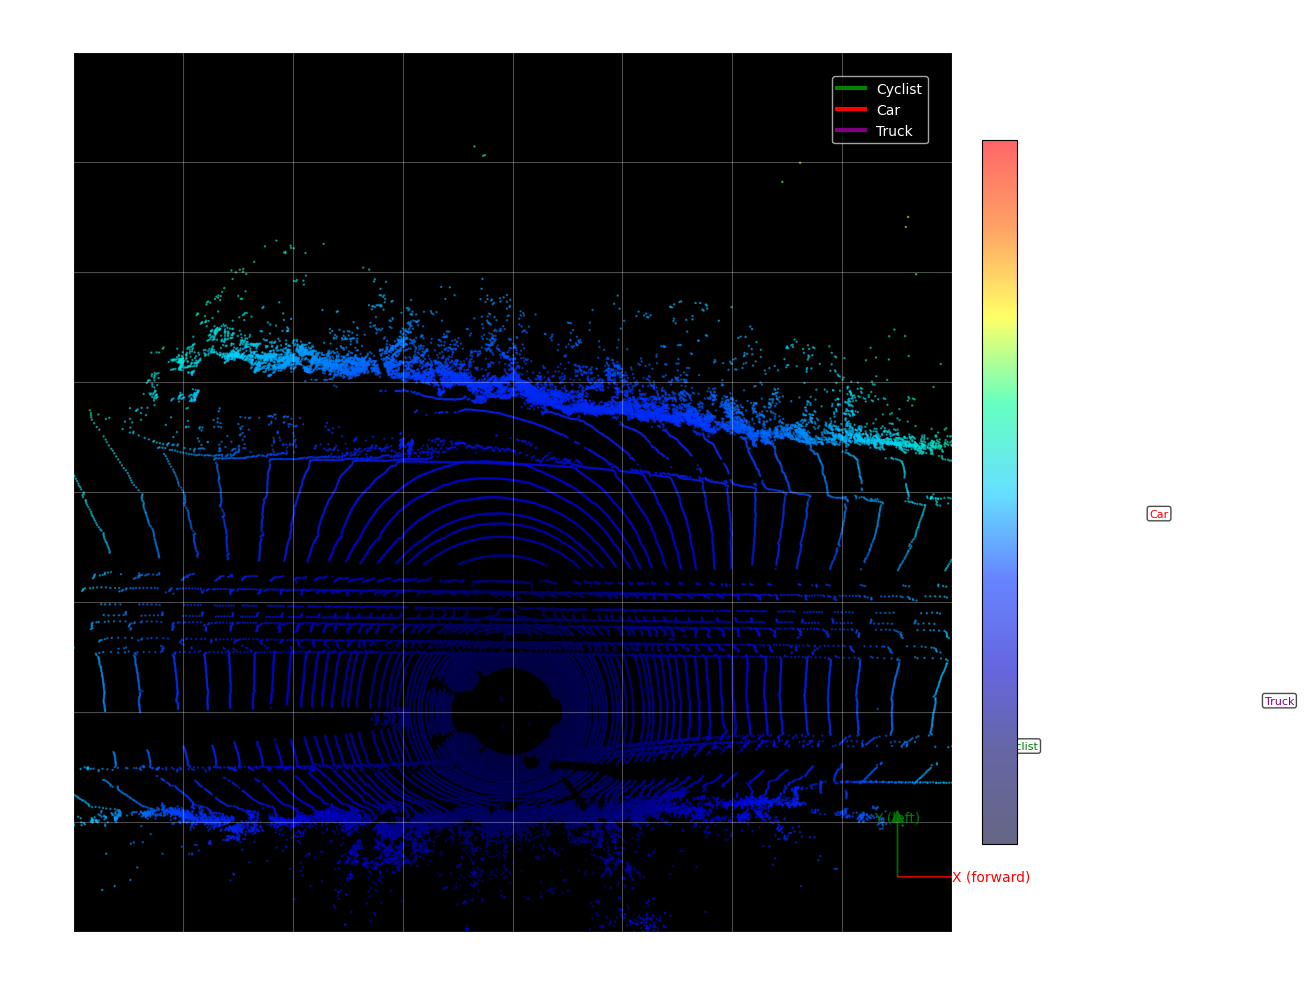


BIRD'S EYE VIEW VISUALIZATION COMPLETE
Objects detected in bird's eye view:
• Truck: (69.7, -0.4, -0.8) meters
• Car: (58.8, 16.6, -1.7) meters
• Cyclist: (46.1, -4.6, -1.0) meters


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
from pathlib import Path

# ==== CONFIG ====
BASE_PATH = Path(r"F:\Work\DeepLearning\Research\dataset")
IMG_DIR = BASE_PATH / "data_object_image_2" / "training" / "image_2"
LIDAR_DIR = BASE_PATH / "data_object_velodyne" / "training" / "velodyne"
CALIB_DIR = BASE_PATH / "data_object_calib" / "training" / "calib"
LABEL_DIR = BASE_PATH / "data_object_label_2" / "training" / "label_2"

# Pick first sample automatically
INDEX = Path(sorted(IMG_DIR.glob("*.png"))[3]).stem
print(f"Using sample index: {INDEX}")

# ==== FUNCTIONS ====
def read_calib_file(filepath):
    """Reads KITTI calibration file and returns a dict."""
    data = {}
    with open(filepath, 'r') as f:
        for line in f:
            if ":" in line:
                key, value = line.split(":", 1)
                data[key] = np.array([float(x) for x in value.strip().split()])
    return data

def load_lidar_data(file_path):
    """Loads LiDAR .bin file from KITTI."""
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)

def read_label_file(filepath):
    """Reads KITTI label file and returns list of objects."""
    objects = []
    if not filepath.exists():
        return objects
    
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split(' ')
            if len(parts) >= 15:
                obj = {
                    'type': parts[0],
                    'truncated': float(parts[1]),
                    'occluded': int(parts[2]),
                    'alpha': float(parts[3]),
                    'bbox_2d': [float(parts[4]), float(parts[5]), float(parts[6]), float(parts[7])],
                    'dimensions': [float(parts[8]), float(parts[9]), float(parts[10])],  # h, w, l
                    'location': [float(parts[11]), float(parts[12]), float(parts[13])],  # x, y, z in camera coords
                    'rotation_y': float(parts[14])
                }
                objects.append(obj)
    return objects

def transform_camera_to_lidar(objects, calib):
    """Transform 3D bounding boxes from camera coordinates to LiDAR coordinates."""
    # Get transformation matrices
    Tr_velo_to_cam = calib['Tr_velo_to_cam'].reshape(3, 4)
    R0_rect = calib['R0_rect'].reshape(3, 3)
    
    # Create inverse transformation matrix
    # From camera to LiDAR: inv(R0_rect) @ inv(Tr_velo_to_cam)
    R0_rect_inv = np.linalg.inv(R0_rect)
    
    # Create 4x4 transformation matrix
    Tr_cam_to_velo = np.linalg.inv(np.vstack([Tr_velo_to_cam, [0, 0, 0, 1]]))[:3, :]
    
    lidar_objects = []
    for obj in objects:
        if obj['type'] != 'DontCare':
            # Transform location from camera to LiDAR coordinates
            cam_location = np.array(obj['location'])
            cam_location_h = np.append(cam_location, 1)  # homogeneous coordinates
            
            # Apply inverse transformations
            rect_location = R0_rect_inv @ cam_location
            rect_location_h = np.append(rect_location, 1)
            lidar_location = (Tr_cam_to_velo @ rect_location_h)[:3]
            
            lidar_obj = obj.copy()
            lidar_obj['location'] = lidar_location
            lidar_objects.append(lidar_obj)
    
    return lidar_objects

def create_3d_bbox_corners_lidar(center, dimensions, rotation_y):
    """Create 8 corners of 3D bounding box in LiDAR coordinates."""
    h, w, l = dimensions
    x, y, z = center
    
    # Create corners in object coordinate system
    corners = np.array([
        [-l/2, -w/2, 0],    # bottom face
        [l/2, -w/2, 0],
        [l/2, w/2, 0],
        [-l/2, w/2, 0],
        [-l/2, -w/2, h],    # top face
        [l/2, -w/2, h],
        [l/2, w/2, h],
        [-l/2, w/2, h]
    ])
    
    # Rotation matrix around Z axis (LiDAR coordinate system)
    cos_ry = np.cos(rotation_y)
    sin_ry = np.sin(rotation_y)
    R = np.array([
        [cos_ry, -sin_ry, 0],
        [sin_ry, cos_ry, 0],
        [0, 0, 1]
    ])
    
    # Apply rotation and translation
    corners = corners @ R.T + np.array([x, y, z])
    return corners

def draw_3d_bbox_bev(ax, corners, obj_type, color_map):
    """Draw 3D bounding box in bird's eye view."""
    color = color_map.get(obj_type, 'gray')
    
    # Draw bottom face (corners 0-3)
    bottom_face = corners[:4]
    bottom_face = np.vstack([bottom_face, bottom_face[0]])  # close the rectangle
    ax.plot(bottom_face[:, 0], bottom_face[:, 1], color=color, linewidth=2, alpha=0.8)
    
    # Draw top face (corners 4-7) 
    top_face = corners[4:]
    top_face = np.vstack([top_face, top_face[0]])  # close the rectangle
    ax.plot(top_face[:, 0], top_face[:, 1], color=color, linewidth=2, alpha=0.6)
    
    # Draw center point
    center_x = corners[:, 0].mean()
    center_y = corners[:, 1].mean()
    ax.plot(center_x, center_y, 'o', color=color, markersize=4)
    
    # Add label
    ax.text(center_x, center_y + 1, obj_type, color=color, fontsize=8, 
           ha='center', va='bottom', 
           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

def create_birds_eye_view(points, lidar_objects, save_path=None):
    """Create bird's eye view with LiDAR points and 3D bounding boxes."""
    
    # Color mapping for different object types
    color_map = {
        'Car': 'red',
        'Van': 'orange', 
        'Truck': 'purple',
        'Pedestrian': 'blue',
        'Person_sitting': 'lightblue',
        'Cyclist': 'green',
        'Tram': 'yellow',
        'Misc': 'gray'
    }
    
    # Extract coordinates
    x = points[:, 0]
    y = points[:, 1] 
    z = points[:, 2]
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    ax.set_facecolor('black')
    
    # Calculate distance for color mapping
    distances = np.sqrt(x**2 + y**2)
    
    # Custom colormap
    colors = ['#000033', '#000066', '#0000CC', '#0033FF', '#00CCFF', '#00FF99', '#FFFF00', '#FF6600', '#FF0000']
    cmap = LinearSegmentedColormap.from_list('kitti', colors, N=256)
    
    # Plot LiDAR points
    scatter = ax.scatter(x, y, c=distances, cmap=cmap, s=0.5, alpha=0.6)
    
    # Draw 3D bounding boxes
    for obj in lidar_objects:
        corners = create_3d_bbox_corners_lidar(obj['location'], obj['dimensions'], obj['rotation_y'])
        draw_3d_bbox_bev(ax, corners, obj['type'], color_map)
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(-40, 40)
    ax.set_ylim(-20, 60)
    
    # Add grid
    ax.grid(True, alpha=0.3, color='white')
    
    # Labels and title
    ax.set_xlabel('X (forward) [meters]', color='white', fontsize=12)
    ax.set_ylabel('Y (left) [meters]', color='white', fontsize=12)
    ax.set_title(f'Bird\'s Eye View - LiDAR Points with 3D Bounding Boxes - Sample {INDEX}', 
                color='white', fontsize=14, pad=20)
    
    # Style the plot
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.8, pad=0.02)
    cbar.set_label('Distance from Origin [meters]', color='white', fontsize=10)
    cbar.ax.tick_params(colors='white')
    
    # Add legend for object types
    unique_types = list(set([obj['type'] for obj in lidar_objects]))
    legend_elements = [plt.Line2D([0], [0], color=color_map.get(obj_type, 'gray'), 
                                 lw=3, label=obj_type) for obj_type in unique_types]
    if legend_elements:
        legend = ax.legend(handles=legend_elements, loc='upper right', 
                          bbox_to_anchor=(0.98, 0.98))
        legend.get_frame().set_facecolor('black')
        legend.get_frame().set_alpha(0.8)
        for text in legend.get_texts():
            text.set_color('white')
    
    # Add coordinate system indicator
    ax.arrow(35, -15, 5, 0, head_width=1, head_length=1, fc='red', ec='red', alpha=0.8)
    ax.arrow(35, -15, 0, 5, head_width=1, head_length=1, fc='green', ec='green', alpha=0.8)
    ax.text(40, -15, 'X (forward)', color='red', fontsize=10, va='center')
    ax.text(35, -10, 'Y (left)', color='green', fontsize=10, ha='center')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, facecolor='black', edgecolor='none', dpi=150, bbox_inches='tight')
    
    plt.show()

# ==== MAIN ====
# File paths
img_path = IMG_DIR / f"{INDEX}.png"
lidar_path = LIDAR_DIR / f"{INDEX}.bin"
calib_path = CALIB_DIR / f"{INDEX}.txt"
label_path = LABEL_DIR / f"{INDEX}.txt"

# Check files exist
for p in [img_path, lidar_path, calib_path]:
    if not p.exists():
        raise FileNotFoundError(f"Missing file: {p}")

# Load data
print("Loading data...")
image = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
points = load_lidar_data(lidar_path)
calib = read_calib_file(calib_path)
objects = read_label_file(label_path)

print(f"Image shape: {image.shape}")
print(f"LiDAR points: {points.shape[0]}")
print(f"Labeled objects: {len(objects)}")

# Transform objects to LiDAR coordinate system
print("Transforming 3D bounding boxes to LiDAR coordinates...")
lidar_objects = transform_camera_to_lidar(objects, calib)
print(f"Objects in LiDAR coordinates: {len(lidar_objects)}")

# Create bird's eye view
print("Creating bird's eye view visualization...")
create_birds_eye_view(points, lidar_objects, f"birds_eye_view_{INDEX}.png")

# Print object statistics
print("\n" + "="*60)
print("BIRD'S EYE VIEW VISUALIZATION COMPLETE")
print("="*60)
print(f"Objects detected in bird's eye view:")
for obj in lidar_objects:
    x, y, z = obj['location']
    print(f"• {obj['type']}: ({x:.1f}, {y:.1f}, {z:.1f}) meters")

Using sample index: 000110
Loading data...
Image shape: (375, 1242, 3)
LiDAR points: 121195
Labeled objects: 12
Projecting LiDAR points to image...
Valid projected points: 17504
Depth range: 5.0m - 79.5m


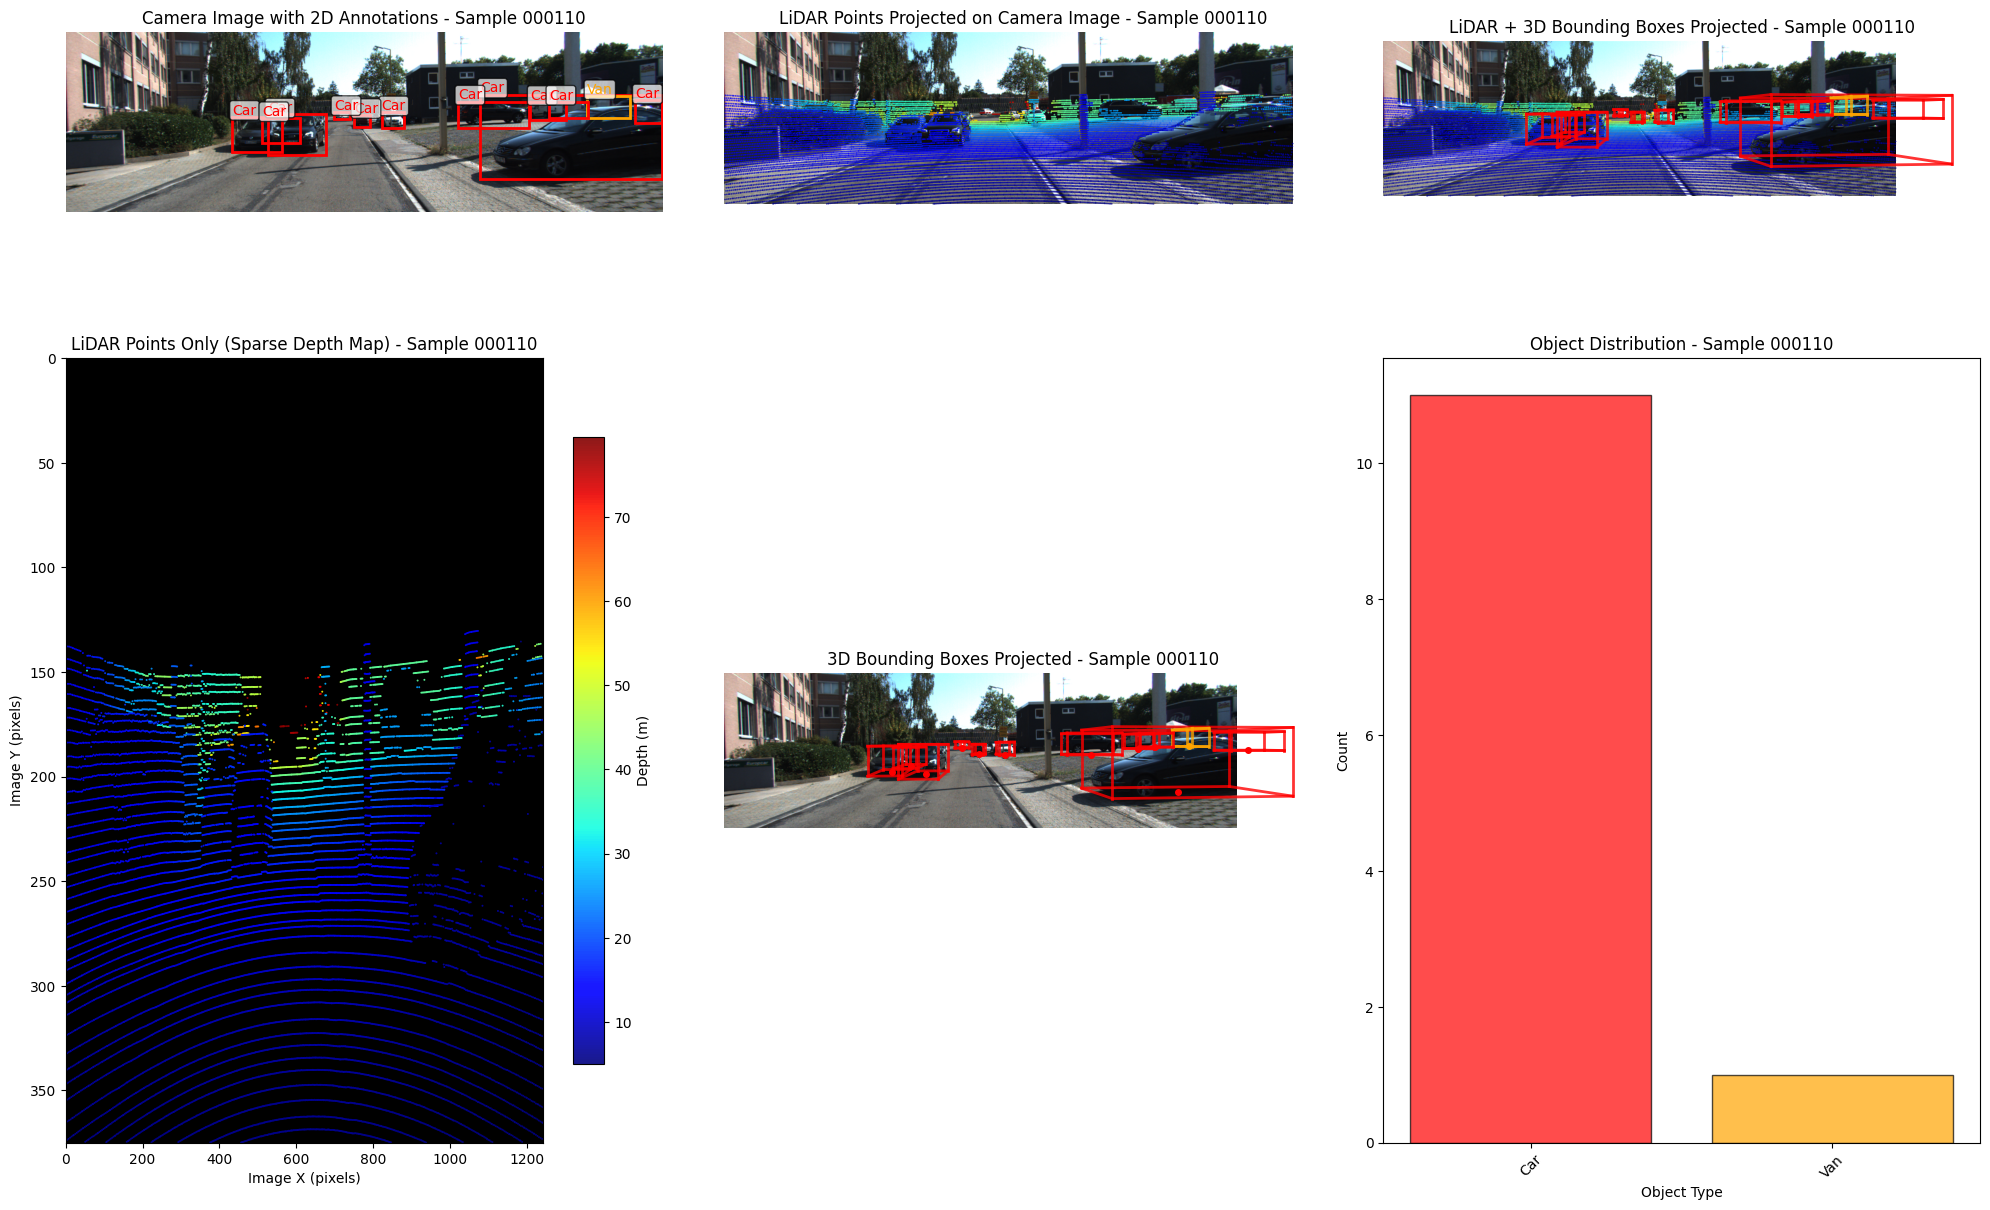

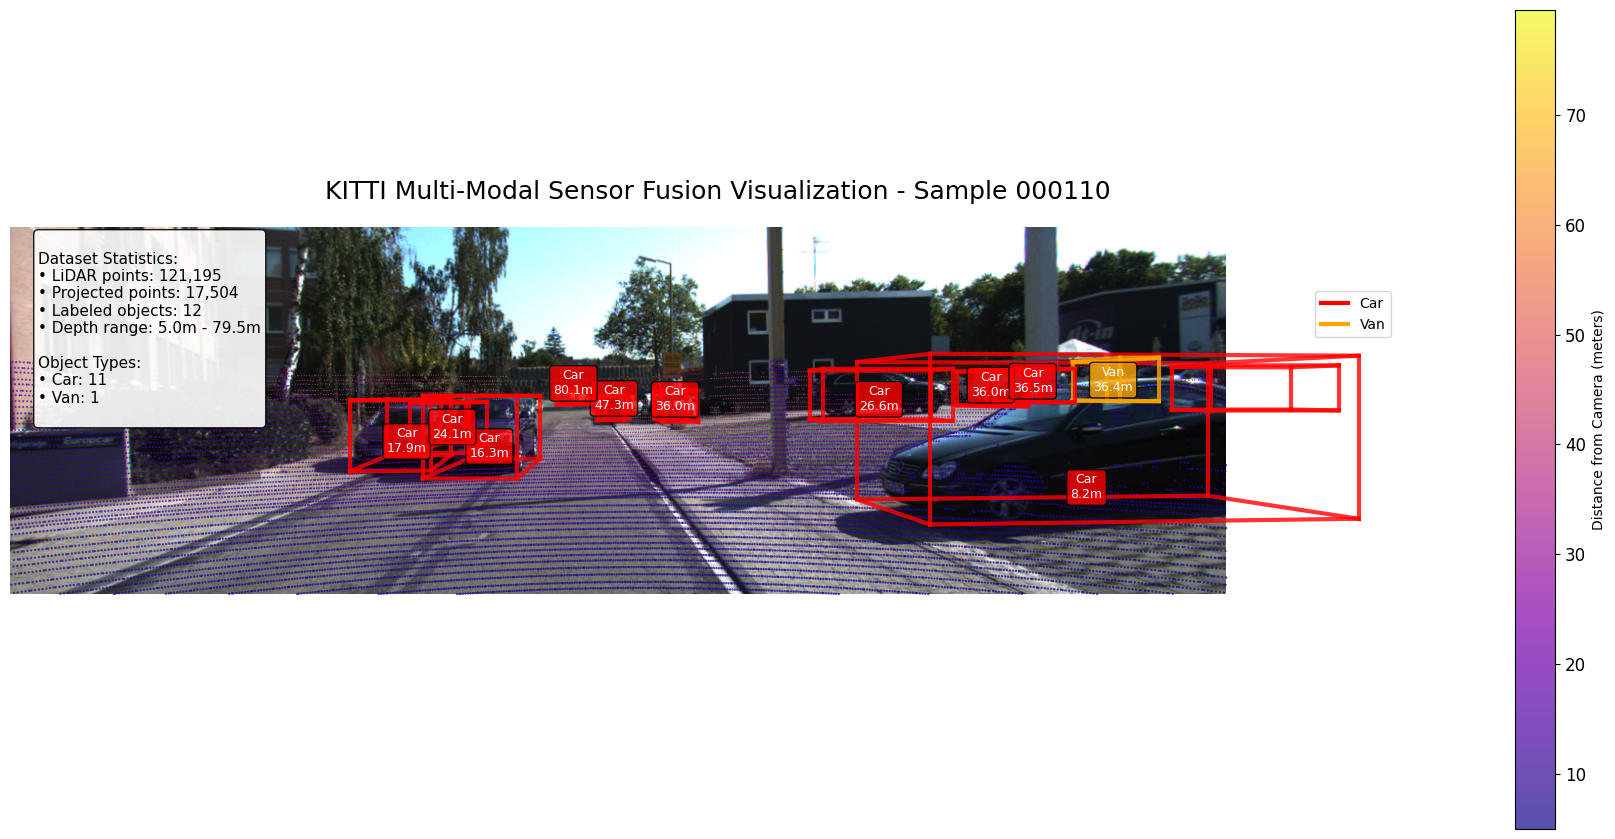


MULTI-MODAL VISUALIZATION COMPLETE
Successfully visualized:
• 17,504 LiDAR points projected to image
• 12 annotated objects
• Object types: Car, Van
• Coverage: 14.4% of LiDAR data visible in camera


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# ==== CONFIG ====
BASE_PATH = Path(r"F:\Work\DeepLearning\Research\dataset")
IMG_DIR = BASE_PATH / "data_object_image_2" / "training" / "image_2"
LIDAR_DIR = BASE_PATH / "data_object_velodyne" / "training" / "velodyne"
CALIB_DIR = BASE_PATH / "data_object_calib" / "training" / "calib"
LABEL_DIR = BASE_PATH / "data_object_label_2" / "training" / "label_2"

# Pick first sample automatically
INDEX = Path(sorted(IMG_DIR.glob("*.png"))[110]).stem
print(f"Using sample index: {INDEX}")

# ==== FUNCTIONS ====
def read_calib_file(filepath):
    """Reads KITTI calibration file and returns a dict."""
    data = {}
    with open(filepath, 'r') as f:
        for line in f:
            if ":" in line:
                key, value = line.split(":", 1)
                data[key] = np.array([float(x) for x in value.strip().split()])
    return data

def load_lidar_data(file_path):
    """Loads LiDAR .bin file from KITTI."""
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)

def read_label_file(filepath):
    """Reads KITTI label file and returns list of objects."""
    objects = []
    if not filepath.exists():
        return objects
    
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split(' ')
            if len(parts) >= 15:
                obj = {
                    'type': parts[0],
                    'truncated': float(parts[1]),
                    'occluded': int(parts[2]),
                    'alpha': float(parts[3]),
                    'bbox_2d': [float(parts[4]), float(parts[5]), float(parts[6]), float(parts[7])],  # left, top, right, bottom
                    'dimensions': [float(parts[8]), float(parts[9]), float(parts[10])],  # h, w, l
                    'location': [float(parts[11]), float(parts[12]), float(parts[13])],  # x, y, z in camera coords
                    'rotation_y': float(parts[14])
                }
                objects.append(obj)
    return objects

def create_3d_bbox_vertices(center, dimensions, rotation_y):
    """Create 8 vertices of a 3D bounding box in camera coordinates."""
    h, w, l = dimensions
    x, y, z = center
    
    # Create box vertices in object coordinate system (centered at origin)
    vertices = np.array([
        [-l/2, -h, -w/2],  # bottom face
        [l/2, -h, -w/2],
        [l/2, -h, w/2],
        [-l/2, -h, w/2],
        [-l/2, 0, -w/2],   # top face
        [l/2, 0, -w/2],
        [l/2, 0, w/2],
        [-l/2, 0, w/2]
    ])
    
    # Rotation matrix around Y axis
    cos_ry = np.cos(rotation_y)
    sin_ry = np.sin(rotation_y)
    R = np.array([
        [cos_ry, 0, sin_ry],
        [0, 1, 0],
        [-sin_ry, 0, cos_ry]
    ])
    
    # Apply rotation and translation
    vertices = vertices @ R.T + np.array([x, y, z])
    return vertices

def project_3d_bbox_to_image(vertices, calib):
    """Project 3D bounding box vertices to image plane."""
    P2 = calib['P2'].reshape(3, 4)
    
    # Add homogeneous coordinate
    vertices_h = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    
    # Project to image plane
    pts_img = (P2 @ vertices_h.T).T
    pts_img[:, 0] /= pts_img[:, 2]
    pts_img[:, 1] /= pts_img[:, 2]
    
    return pts_img[:, :2]

def draw_3d_bbox_on_image(ax, vertices_2d, color='red', linewidth=2):
    """Draw 3D bounding box edges on image."""
    # Define the 12 edges of the box
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # bottom face
        [4, 5], [5, 6], [6, 7], [7, 4],  # top face
        [0, 4], [1, 5], [2, 6], [3, 7]   # vertical edges
    ]
    
    # Draw edges
    for edge in edges:
        points = vertices_2d[edge]
        ax.plot(points[:, 0], points[:, 1], color=color, linewidth=linewidth, alpha=0.8)

def draw_2d_bbox_on_image(ax, bbox_2d, label, color='green', linewidth=2):
    """Draw 2D bounding box on image."""
    left, top, right, bottom = bbox_2d
    
    # Draw rectangle
    rect = plt.Rectangle((left, top), right-left, bottom-top, 
                        fill=False, color=color, linewidth=linewidth)
    ax.add_patch(rect)
    
    # Add label
    ax.text(left, top-5, label, color=color, fontsize=10, 
           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
def project_lidar_to_image(points, calib):
    """Projects LiDAR points to camera image plane."""
    # Get calibration matrices
    P2 = calib['P2'].reshape(3, 4)
    Tr_velo_to_cam = calib['Tr_velo_to_cam'].reshape(3, 4)
    R0_rect = calib['R0_rect'].reshape(3, 3)
    
    # Convert to homogeneous coordinates
    points_h = np.hstack((points[:, :3], np.ones((points.shape[0], 1))))
    
    # Transform: Velodyne -> Camera -> Rectified Camera
    pts_cam = (R0_rect @ (Tr_velo_to_cam @ points_h.T)).T
    
    # Filter points in front of camera (positive Z)
    front_mask = pts_cam[:, 2] > 0
    pts_cam_front = pts_cam[front_mask]
    
    # Project to image plane
    pts_cam_h = np.hstack((pts_cam_front, np.ones((pts_cam_front.shape[0], 1))))
    pts_img = (P2 @ pts_cam_h.T).T
    
    # Convert from homogeneous coordinates
    pts_img[:, 0] /= pts_img[:, 2]
    pts_img[:, 1] /= pts_img[:, 2]
    
    return pts_img[:, :2], pts_cam_front[:, 2]

# ==== MAIN ====
# File paths
img_path = IMG_DIR / f"{INDEX}.png"
lidar_path = LIDAR_DIR / f"{INDEX}.bin"
calib_path = CALIB_DIR / f"{INDEX}.txt"
label_path = LABEL_DIR / f"{INDEX}.txt"

# Check files exist
for p in [img_path, lidar_path, calib_path]:
    if not p.exists():
        raise FileNotFoundError(f"Missing file: {p}")

# Load data
print("Loading data...")
image = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
points = load_lidar_data(lidar_path)
calib = read_calib_file(calib_path)
objects = read_label_file(label_path)

print(f"Image shape: {image.shape}")
print(f"LiDAR points: {points.shape[0]}")
print(f"Labeled objects: {len(objects)}")

# Project LiDAR points to image
print("Projecting LiDAR points to image...")
pts_img, depth = project_lidar_to_image(points, calib)

# Filter points within image bounds
h, w = image.shape[:2]
valid_mask = (pts_img[:, 0] >= 0) & (pts_img[:, 0] < w) & \
             (pts_img[:, 1] >= 0) & (pts_img[:, 1] < h)

pts_img_valid = pts_img[valid_mask]
depth_valid = depth[valid_mask]

print(f"Valid projected points: {len(pts_img_valid)}")
print(f"Depth range: {depth_valid.min():.1f}m - {depth_valid.max():.1f}m")

# ==== VISUALIZATION ====
# Color mapping for different object types
color_map = {
    'Car': 'red',
    'Van': 'orange',
    'Truck': 'purple',
    'Pedestrian': 'blue',
    'Person_sitting': 'lightblue',
    'Cyclist': 'green',
    'Tram': 'yellow',
    'Misc': 'gray',
    'DontCare': 'lightgray'
}

# Create figure with subplots
fig = plt.figure(figsize=(20, 15))

# 1. Original camera image with 2D bounding boxes
plt.subplot(2, 3, 1)
ax1 = plt.gca()
ax1.imshow(image)
for obj in objects:
    if obj['type'] != 'DontCare':
        color = color_map.get(obj['type'], 'gray')
        draw_2d_bbox_on_image(ax1, obj['bbox_2d'], obj['type'], color=color)
plt.title(f"Camera Image with 2D Annotations - Sample {INDEX}", fontsize=12)
plt.axis('off')

# 2. LiDAR points projected on camera image
plt.subplot(2, 3, 2)
ax2 = plt.gca()
ax2.imshow(image)
scatter = ax2.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                     c=depth_valid, cmap='jet', s=1.5, alpha=0.7, edgecolors='none')
plt.title(f"LiDAR Points Projected on Camera Image - Sample {INDEX}", fontsize=12)
plt.axis('off')

# 3. LiDAR + 3D bounding boxes projected
plt.subplot(2, 3, 3)
ax3 = plt.gca()
ax3.imshow(image)
ax3.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
           c=depth_valid, cmap='jet', s=1.5, alpha=0.6, edgecolors='none')

# Project and draw 3D bounding boxes
for obj in objects:
    if obj['type'] != 'DontCare':
        vertices_3d = create_3d_bbox_vertices(obj['location'], obj['dimensions'], obj['rotation_y'])
        vertices_2d = project_3d_bbox_to_image(vertices_3d, calib)
        color = color_map.get(obj['type'], 'gray')
        draw_3d_bbox_on_image(ax3, vertices_2d, color=color, linewidth=2)

plt.title(f"LiDAR + 3D Bounding Boxes Projected - Sample {INDEX}", fontsize=12)
plt.axis('off')

# 4. LiDAR points only (sparse depth map)
plt.subplot(2, 3, 4)
plt.gca().set_facecolor('black')
scatter2 = plt.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                      c=depth_valid, cmap='jet', s=2, alpha=0.9, edgecolors='none')
plt.colorbar(scatter2, label='Depth (m)', shrink=0.8)
plt.xlim(0, w)
plt.ylim(h, 0)
plt.title(f"LiDAR Points Only (Sparse Depth Map) - Sample {INDEX}", fontsize=12)
plt.xlabel('Image X (pixels)')
plt.ylabel('Image Y (pixels)')

# 5. 3D bounding boxes only
plt.subplot(2, 3, 5)
ax5 = plt.gca()
ax5.imshow(image)
for obj in objects:
    if obj['type'] != 'DontCare':
        vertices_3d = create_3d_bbox_vertices(obj['location'], obj['dimensions'], obj['rotation_y'])
        vertices_2d = project_3d_bbox_to_image(vertices_3d, calib)
        color = color_map.get(obj['type'], 'gray')
        draw_3d_bbox_on_image(ax5, vertices_2d, color=color, linewidth=2)
        
        # Add center point
        center_2d = project_3d_bbox_to_image(np.array([obj['location']]), calib)
        ax5.plot(center_2d[0, 0], center_2d[0, 1], 'o', color=color, markersize=4)
        
plt.title(f"3D Bounding Boxes Projected - Sample {INDEX}", fontsize=12)
plt.axis('off')

# 6. Object statistics
plt.subplot(2, 3, 6)
object_types = [obj['type'] for obj in objects if obj['type'] != 'DontCare']
unique_types, counts = np.unique(object_types, return_counts=True)
colors = [color_map.get(obj_type, 'gray') for obj_type in unique_types]
plt.bar(unique_types, counts, color=colors, alpha=0.7, edgecolor='black')
plt.title(f"Object Distribution - Sample {INDEX}", fontsize=12)
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ==== MAIN DETAILED VISUALIZATION ====
# Create a comprehensive visualization
plt.figure(figsize=(18, 12))
ax_main = plt.gca()
ax_main.imshow(image)

# Plot LiDAR points with variable sizes
point_sizes = np.clip(30 / depth_valid, 0.3, 3)
scatter = ax_main.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                         c=depth_valid, cmap='plasma', s=point_sizes, 
                         alpha=0.7, edgecolors='none', label='LiDAR Points')

# Draw 3D bounding boxes
for obj in objects:
    if obj['type'] != 'DontCare':
        vertices_3d = create_3d_bbox_vertices(obj['location'], obj['dimensions'], obj['rotation_y'])
        vertices_2d = project_3d_bbox_to_image(vertices_3d, calib)
        color = color_map.get(obj['type'], 'gray')
        draw_3d_bbox_on_image(ax_main, vertices_2d, color=color, linewidth=3)
        
        # Add object label
        center_2d = project_3d_bbox_to_image(np.array([obj['location']]), calib)
        if 0 <= center_2d[0, 0] < w and 0 <= center_2d[0, 1] < h:
            ax_main.text(center_2d[0, 0], center_2d[0, 1]-10, 
                        f"{obj['type']}\n{obj['location'][2]:.1f}m", 
                        color='white', fontsize=9, ha='center',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.8))

# Add colorbar
cbar = plt.colorbar(scatter, label='Distance from Camera (meters)', shrink=0.7)
cbar.ax.tick_params(labelsize=12)

plt.title(f"KITTI Multi-Modal Sensor Fusion Visualization - Sample {INDEX}", 
          fontsize=18, pad=20)
plt.axis('off')

# Add comprehensive statistics
stats_text = f"""
Dataset Statistics:
• LiDAR points: {points.shape[0]:,}
• Projected points: {len(pts_img_valid):,}
• Labeled objects: {len([o for o in objects if o['type'] != 'DontCare'])}
• Depth range: {depth_valid.min():.1f}m - {depth_valid.max():.1f}m

Object Types:
"""
for obj_type, count in zip(unique_types, counts):
    stats_text += f"• {obj_type}: {count}\n"

plt.text(0.02, 0.98, stats_text, transform=ax_main.transAxes, 
         fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Add legend for object types
legend_elements = [plt.Line2D([0], [0], color=color_map.get(obj_type, 'gray'), 
                             lw=3, label=obj_type) for obj_type in unique_types]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.85))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MULTI-MODAL VISUALIZATION COMPLETE")
print("="*60)
print(f"Successfully visualized:")
print(f"• {len(pts_img_valid):,} LiDAR points projected to image")
print(f"• {len([o for o in objects if o['type'] != 'DontCare'])} annotated objects")
print(f"• Object types: {', '.join(unique_types)}")
print(f"• Coverage: {len(pts_img_valid)/points.shape[0]*100:.1f}% of LiDAR data visible in camera")

Using sample index: 000110
Loading data...
Image shape: (375, 1242, 3)
LiDAR points: 121195
Labeled objects: 12
Projecting LiDAR points to image...
Valid projected points: 17504
Depth range: 5.0m - 79.5m


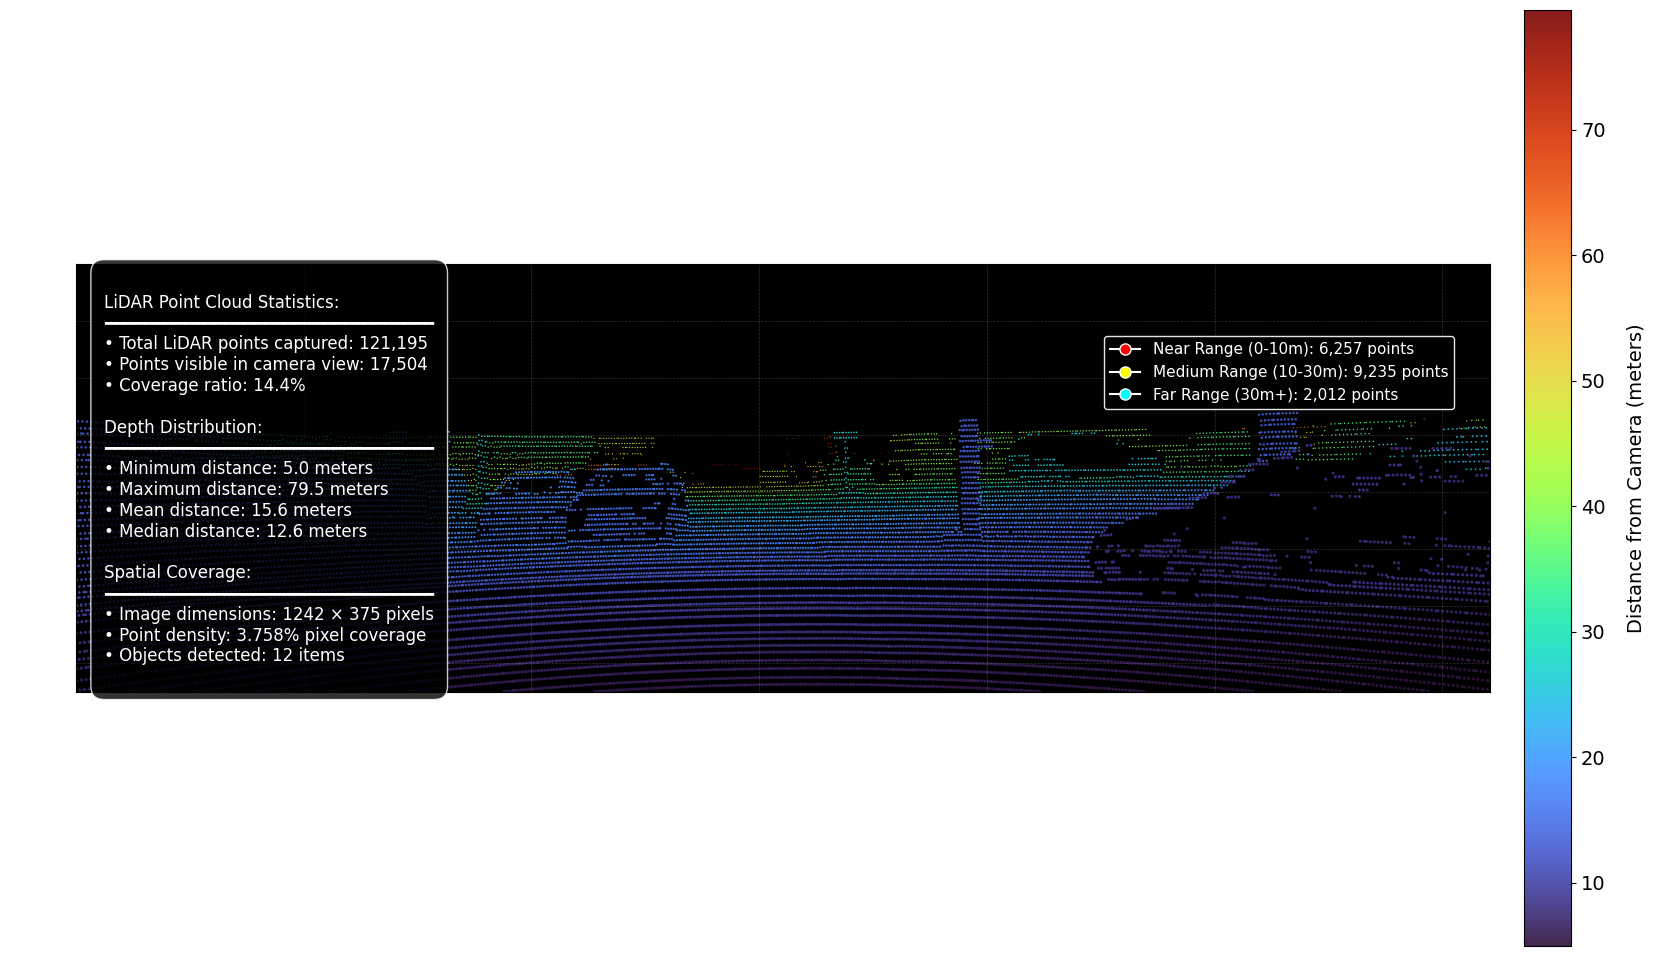

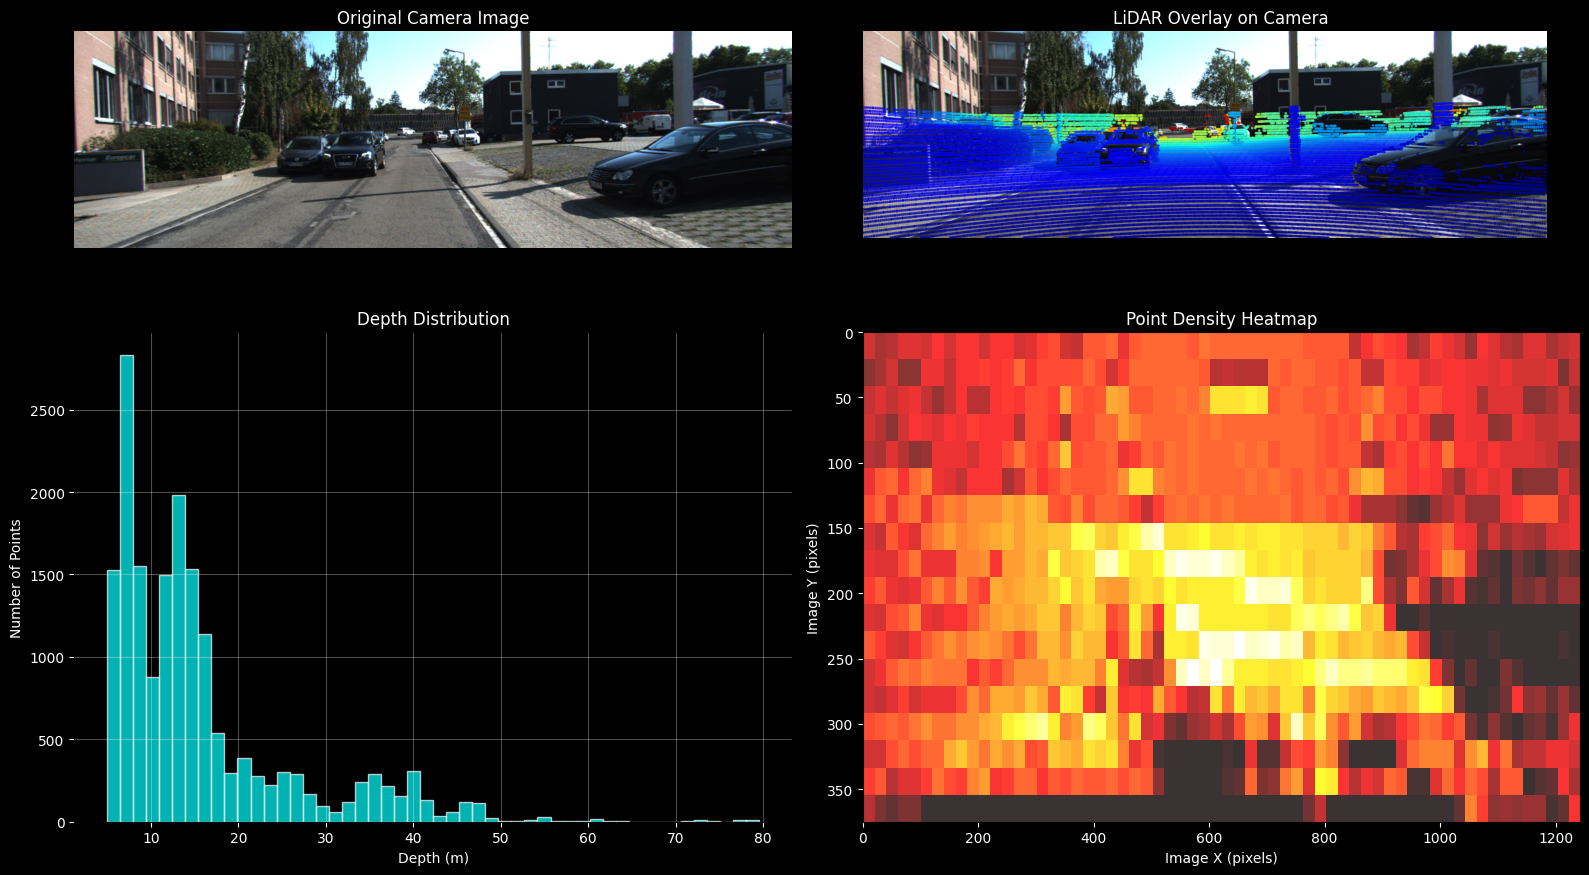


MULTI-MODAL VISUALIZATION COMPLETE
Successfully visualized:
• 17,504 LiDAR points projected to image
• 12 annotated objects


NameError: name 'unique_types' is not defined

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# ==== CONFIG ====
BASE_PATH = Path(r"F:\Work\DeepLearning\Research\dataset")
IMG_DIR = BASE_PATH / "data_object_image_2" / "training" / "image_2"
LIDAR_DIR = BASE_PATH / "data_object_velodyne" / "training" / "velodyne"
CALIB_DIR = BASE_PATH / "data_object_calib" / "training" / "calib"
LABEL_DIR = BASE_PATH / "data_object_label_2" / "training" / "label_2"

# Pick first sample automatically
INDEX = Path(sorted(IMG_DIR.glob("*.png"))[110]).stem
print(f"Using sample index: {INDEX}")

# ==== FUNCTIONS ====
def read_calib_file(filepath):
    """Reads KITTI calibration file and returns a dict."""
    data = {}
    with open(filepath, 'r') as f:
        for line in f:
            if ":" in line:
                key, value = line.split(":", 1)
                data[key] = np.array([float(x) for x in value.strip().split()])
    return data

def load_lidar_data(file_path):
    """Loads LiDAR .bin file from KITTI."""
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)

def read_label_file(filepath):
    """Reads KITTI label file and returns list of objects."""
    objects = []
    if not filepath.exists():
        return objects
    
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split(' ')
            if len(parts) >= 15:
                obj = {
                    'type': parts[0],
                    'truncated': float(parts[1]),
                    'occluded': int(parts[2]),
                    'alpha': float(parts[3]),
                    'bbox_2d': [float(parts[4]), float(parts[5]), float(parts[6]), float(parts[7])],  # left, top, right, bottom
                    'dimensions': [float(parts[8]), float(parts[9]), float(parts[10])],  # h, w, l
                    'location': [float(parts[11]), float(parts[12]), float(parts[13])],  # x, y, z in camera coords
                    'rotation_y': float(parts[14])
                }
                objects.append(obj)
    return objects

def create_3d_bbox_vertices(center, dimensions, rotation_y):
    """Create 8 vertices of a 3D bounding box in camera coordinates."""
    h, w, l = dimensions
    x, y, z = center
    
    # Create box vertices in object coordinate system (centered at origin)
    vertices = np.array([
        [-l/2, -h, -w/2],  # bottom face
        [l/2, -h, -w/2],
        [l/2, -h, w/2],
        [-l/2, -h, w/2],
        [-l/2, 0, -w/2],   # top face
        [l/2, 0, -w/2],
        [l/2, 0, w/2],
        [-l/2, 0, w/2]
    ])
    
    # Rotation matrix around Y axis
    cos_ry = np.cos(rotation_y)
    sin_ry = np.sin(rotation_y)
    R = np.array([
        [cos_ry, 0, sin_ry],
        [0, 1, 0],
        [-sin_ry, 0, cos_ry]
    ])
    
    # Apply rotation and translation
    vertices = vertices @ R.T + np.array([x, y, z])
    return vertices

def project_3d_bbox_to_image(vertices, calib):
    """Project 3D bounding box vertices to image plane."""
    P2 = calib['P2'].reshape(3, 4)
    
    # Add homogeneous coordinate
    vertices_h = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    
    # Project to image plane
    pts_img = (P2 @ vertices_h.T).T
    pts_img[:, 0] /= pts_img[:, 2]
    pts_img[:, 1] /= pts_img[:, 2]
    
    return pts_img[:, :2]

def draw_3d_bbox_on_image(ax, vertices_2d, color='red', linewidth=2):
    """Draw 3D bounding box edges on image."""
    # Define the 12 edges of the box
    edges = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # bottom face
        [4, 5], [5, 6], [6, 7], [7, 4],  # top face
        [0, 4], [1, 5], [2, 6], [3, 7]   # vertical edges
    ]
    
    # Draw edges
    for edge in edges:
        points = vertices_2d[edge]
        ax.plot(points[:, 0], points[:, 1], color=color, linewidth=linewidth, alpha=0.8)

def draw_2d_bbox_on_image(ax, bbox_2d, label, color='green', linewidth=2):
    """Draw 2D bounding box on image."""
    left, top, right, bottom = bbox_2d
    
    # Draw rectangle
    rect = plt.Rectangle((left, top), right-left, bottom-top, 
                        fill=False, color=color, linewidth=linewidth)
    ax.add_patch(rect)
    
    # Add label
    ax.text(left, top-5, label, color=color, fontsize=10, 
           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
def project_lidar_to_image(points, calib):
    """Projects LiDAR points to camera image plane."""
    # Get calibration matrices
    P2 = calib['P2'].reshape(3, 4)
    Tr_velo_to_cam = calib['Tr_velo_to_cam'].reshape(3, 4)
    R0_rect = calib['R0_rect'].reshape(3, 3)
    
    # Convert to homogeneous coordinates
    points_h = np.hstack((points[:, :3], np.ones((points.shape[0], 1))))
    
    # Transform: Velodyne -> Camera -> Rectified Camera
    pts_cam = (R0_rect @ (Tr_velo_to_cam @ points_h.T)).T
    
    # Filter points in front of camera (positive Z)
    front_mask = pts_cam[:, 2] > 0
    pts_cam_front = pts_cam[front_mask]
    
    # Project to image plane
    pts_cam_h = np.hstack((pts_cam_front, np.ones((pts_cam_front.shape[0], 1))))
    pts_img = (P2 @ pts_cam_h.T).T
    
    # Convert from homogeneous coordinates
    pts_img[:, 0] /= pts_img[:, 2]
    pts_img[:, 1] /= pts_img[:, 2]
    
    return pts_img[:, :2], pts_cam_front[:, 2]

# ==== MAIN ====
# File paths
img_path = IMG_DIR / f"{INDEX}.png"
lidar_path = LIDAR_DIR / f"{INDEX}.bin"
calib_path = CALIB_DIR / f"{INDEX}.txt"
label_path = LABEL_DIR / f"{INDEX}.txt"

# Check files exist
for p in [img_path, lidar_path, calib_path]:
    if not p.exists():
        raise FileNotFoundError(f"Missing file: {p}")

# Load data
print("Loading data...")
image = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
points = load_lidar_data(lidar_path)
calib = read_calib_file(calib_path)
objects = read_label_file(label_path)

print(f"Image shape: {image.shape}")
print(f"LiDAR points: {points.shape[0]}")
print(f"Labeled objects: {len(objects)}")

# Project LiDAR points to image
print("Projecting LiDAR points to image...")
pts_img, depth = project_lidar_to_image(points, calib)

# Filter points within image bounds
h, w = image.shape[:2]
valid_mask = (pts_img[:, 0] >= 0) & (pts_img[:, 0] < w) & \
             (pts_img[:, 1] >= 0) & (pts_img[:, 1] < h)

pts_img_valid = pts_img[valid_mask]
depth_valid = depth[valid_mask]

print(f"Valid projected points: {len(pts_img_valid)}")
print(f"Depth range: {depth_valid.min():.1f}m - {depth_valid.max():.1f}m")

# ==== MAIN LIDAR POINTS VISUALIZATION ====
# Create the main detailed LiDAR-only visualization
plt.figure(figsize=(18, 12))
ax_main = plt.gca()
ax_main.set_facecolor('black')  # Black background for better contrast

# Plot LiDAR points with enhanced visualization
point_sizes = np.clip(40 / depth_valid, 0.8, 5)  # Variable sizes based on depth
scatter = ax_main.scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                         c=depth_valid, cmap='turbo', s=point_sizes, 
                         alpha=0.9, edgecolors='none')

# Enhanced colorbar
cbar = plt.colorbar(scatter, label='Distance from Camera (meters)', shrink=0.8, pad=0.02)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Distance from Camera (meters)', fontsize=14, labelpad=15)

# Set proper limits and aspect
ax_main.set_xlim(0, w)
ax_main.set_ylim(h, 0)  # Flip y-axis for image coordinates
ax_main.set_aspect('equal')

# Add grid for better spatial understanding
ax_main.grid(True, alpha=0.2, color='white', linestyle='--', linewidth=0.5)

# Enhanced title and labels
plt.title(f"KITTI LiDAR Point Cloud Projection (Sparse Depth Map) - Sample {INDEX}", 
          fontsize=20, pad=25, color='white', weight='bold')
plt.xlabel('Image X Coordinate (pixels)', fontsize=14, color='white')
plt.ylabel('Image Y Coordinate (pixels)', fontsize=14, color='white')

# Customize tick colors
ax_main.tick_params(colors='white', labelsize=12)

# Add comprehensive statistics panel
stats_text = f"""
LiDAR Point Cloud Statistics:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Total LiDAR points captured: {points.shape[0]:,}
• Points visible in camera view: {len(pts_img_valid):,}
• Coverage ratio: {len(pts_img_valid)/points.shape[0]*100:.1f}%

Depth Distribution:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Minimum distance: {depth_valid.min():.1f} meters
• Maximum distance: {depth_valid.max():.1f} meters  
• Mean distance: {depth_valid.mean():.1f} meters
• Median distance: {np.median(depth_valid):.1f} meters

Spatial Coverage:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Image dimensions: {w} × {h} pixels
• Point density: {len(pts_img_valid)/(w*h)*100:.3f}% pixel coverage
• Objects detected: {len([o for o in objects if o['type'] != 'DontCare'])} items
"""

plt.text(0.02, 0.98, stats_text, transform=ax_main.transAxes, 
         fontsize=12, verticalalignment='top', color='white',
         bbox=dict(boxstyle='round,pad=0.8', facecolor='black', alpha=0.8, edgecolor='white'))

# Add depth range indicators
depth_ranges = [
    (0, 10, "Near Range (0-10m)", 'red'),
    (10, 30, "Medium Range (10-30m)", 'yellow'), 
    (30, 100, "Far Range (30m+)", 'cyan')
]

legend_elements = []
for min_d, max_d, label, color in depth_ranges:
    mask = (depth_valid >= min_d) & (depth_valid < max_d)
    count = np.sum(mask)
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                    markerfacecolor=color, markersize=8,
                                    label=f"{label}: {count:,} points"))

plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.85),
          fontsize=11, facecolor='black', edgecolor='white', 
          labelcolor='white', framealpha=0.9)

plt.tight_layout()
plt.show()

# ==== SECONDARY VISUALIZATIONS FOR COMPARISON ====
# Create smaller comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.patch.set_facecolor('black')

# Top left: Original camera image
axes[0,0].imshow(image)
axes[0,0].set_title("Original Camera Image", fontsize=12, color='white')
axes[0,0].axis('off')

# Top right: LiDAR overlay on image
axes[0,1].imshow(image)
axes[0,1].scatter(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                 c=depth_valid, cmap='jet', s=1, alpha=0.6)
axes[0,1].set_title("LiDAR Overlay on Camera", fontsize=12, color='white')
axes[0,1].axis('off')

# Bottom left: Depth histogram
axes[1,0].hist(depth_valid, bins=50, alpha=0.7, color='cyan', edgecolor='white')
axes[1,0].set_xlabel('Depth (m)', color='white')
axes[1,0].set_ylabel('Number of Points', color='white')
axes[1,0].set_title('Depth Distribution', fontsize=12, color='white')
axes[1,0].set_facecolor('black')
axes[1,0].tick_params(colors='white')
axes[1,0].grid(True, alpha=0.3, color='white')

# Bottom right: Point density heatmap
hist_2d, xedges, yedges = np.histogram2d(pts_img_valid[:, 0], pts_img_valid[:, 1], 
                                        bins=[w//20, h//20])
axes[1,1].imshow(hist_2d.T, origin='lower', extent=[0, w, h, 0], 
                cmap='hot', alpha=0.8, aspect='auto')
axes[1,1].set_title('Point Density Heatmap', fontsize=12, color='white')
axes[1,1].set_xlabel('Image X (pixels)', color='white')
axes[1,1].set_ylabel('Image Y (pixels)', color='white')
axes[1,1].tick_params(colors='white')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("MULTI-MODAL VISUALIZATION COMPLETE")
print("="*60)
print(f"Successfully visualized:")
print(f"• {len(pts_img_valid):,} LiDAR points projected to image")
print(f"• {len([o for o in objects if o['type'] != 'DontCare'])} annotated objects")
print(f"• Object types: {', '.join(unique_types)}")
print(f"• Coverage: {len(pts_img_valid)/points.shape[0]*100:.1f}% of LiDAR data visible in camera")